<a href="https://colab.research.google.com/github/parthkhurana07/Bioinformatics_Projects_Parth/blob/main/Project_HIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DOWNLOAD CHEMBL WEBRESOURCE**

In [ ]:
pip install chembl_webresource_client


     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 636 kB 19.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

**SEARCH QUERY -> "PROTEASE" -> "HUMAN IMMUNODEFICIENCY VIRUS 1"**

In [ ]:
# Target search for protease
target = new_client.target
target_query = target.search('protease')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q4U254', 'xref_name': None, 'xre...",Human rhinovirus sp.,Human rhinovirus A protease,25.0,False,CHEMBL2857,"[{'accession': 'Q4U254', 'component_descriptio...",SINGLE PROTEIN,169066
1,[],Human immunodeficiency virus 1,Protease,25.0,False,CHEMBL2366517,"[{'accession': 'Q9YQ12', 'component_descriptio...",SINGLE PROTEIN,11676
2,[],Human immunodeficiency virus,HIV protease,25.0,False,CHEMBL3638323,"[{'accession': 'Q9YQ30', 'component_descriptio...",SINGLE PROTEIN,12721
3,"[{'xref_id': 'Q72874', 'xref_name': None, 'xre...",Human immunodeficiency virus 1,Human immunodeficiency virus type 1 protease,12.0,False,CHEMBL243,"[{'accession': 'Q72874', 'component_descriptio...",SINGLE PROTEIN,11676
4,"[{'xref_id': 'Q82323', 'xref_name': None, 'xre...",Human T-lymphotropic virus 1,Protease,12.0,False,CHEMBL5297,"[{'accession': 'Q82323', 'component_descriptio...",SINGLE PROTEIN,11908
...,...,...,...,...,...,...,...,...,...
666,[],Homo sapiens,MMP-1/MMP-2,3.0,False,CHEMBL4523984,"[{'accession': 'P08253', 'component_descriptio...",SELECTIVITY GROUP,9606
667,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,2.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606
668,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,2.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
669,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,2.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859


In [ ]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL2366517'

**USING STANDARD TYPE -> IC50 (Lower the standard value(conc.) better the molecule)**

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id= selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1985918,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '12.05', 'le': '0.23', 'lle': '3.68', ...",CHEMBL1627209,None,CHEMBL1627209,7.68,False,http://www.openphacts.org/units/Nanomolar,662588,=,1,True,=,None,IC50,nM,None,21.1,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,21.1
1,None,1985919,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '10.92', 'le': '0.21', 'lle': '3.01', ...",CHEMBL1627287,None,CHEMBL1627287,6.81,False,http://www.openphacts.org/units/Nanomolar,662593,=,1,True,=,None,IC50,nM,None,153.9,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,153.9
2,None,1985920,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '11.91', 'le': '0.23', 'lle': '3.63', ...",CHEMBL1627235,None,CHEMBL1627235,7.43,False,http://www.openphacts.org/units/Nanomolar,662592,=,1,True,=,None,IC50,nM,None,37.3,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,37.3


In [ ]:
df.standard_type.unique()


array(['IC50'], dtype=object)

**CONVERTING DATA FRAME TO .csv FILE AND SAVING IT IN GOOGLE DRIVE**

In [ ]:
df.to_csv('hiv_bioactivity.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data2"


mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data2’: File exists


In [ ]:
! cp hiv_bioactivity.csv "/content/gdrive/My Drive/Colab Notebooks/data2"


In [ ]:
ls -l "/content/gdrive/My Drive/Colab Notebooks/data2"

total 514
-rw------- 1 root root 525684 Aug 30 16:44 hiv_bioactivity.csv


In [ ]:
! head hiv_bioactivity.csv


activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,1985918,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,,,BAO_0000190,BAO_0000357,single protein format,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1)C[S+]([O-])C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O,,,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '12.05', 'le': '0.23', 'lle': '3.68', 'sei': '

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**HANDLING MISSING DATA, IF ANY**

In [ ]:
df2 = df[df.standard_value.notna()]


In [ ]:
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1985918,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '12.05', 'le': '0.23', 'lle': '3.68', ...",CHEMBL1627209,None,CHEMBL1627209,7.68,False,http://www.openphacts.org/units/Nanomolar,662588,=,1,True,=,None,IC50,nM,None,21.1,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,21.1
1,None,1985919,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '10.92', 'le': '0.21', 'lle': '3.01', ...",CHEMBL1627287,None,CHEMBL1627287,6.81,False,http://www.openphacts.org/units/Nanomolar,662593,=,1,True,=,None,IC50,nM,None,153.9,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,153.9
2,None,1985920,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '11.91', 'le': '0.23', 'lle': '3.63', ...",CHEMBL1627235,None,CHEMBL1627235,7.43,False,http://www.openphacts.org/units/Nanomolar,662592,=,1,True,=,None,IC50,nM,None,37.3,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,37.3
3,None,1985921,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,"{'bei': '13.20', 'le': '0.25', 'lle': '4.30', ...",CHEMBL1627210,None,CHEMBL1627210,8.60,True,http://www.openphacts.org/units/Nanomolar,662591,=,1,True,=,None,IC50,nM,None,2.5,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,2.5
4,None,1985922,[],CHEMBL899796,Inhibition of HIV1 recombinant protease,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,None,None,CHEMBL1137472,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL396814,None,CHEMBL396814,None,False,http://www.openphacts.org/units/Nanomolar,662590,>,1,True,>,None,IC50,nM,None,10000.0,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,None,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,None,19207212,[],CHEMBL4392471,Inhibition of HIV1 protease activity,B,None,None,BAO_0000190,BAO_0000357,single protein format,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,None,None,CHEMBL4390686,J Med Chem,2019,"{'bei': '10.82', 'le': '0.20', 'lle': '4.29', ...",CHEMBL4525849,None,CHEMBL4525849,8.40,False,http://www.openphacts.org/units/Nanomolar,3205677,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL2366517,Human immunodeficiency virus 1,Protease,11676,None,None,IC50,nM,UO_0000065,1145.0,4.0
881,None,19207213,[],CHEMBL4392471,Inhibition of HIV1 protease activity,B,None,None,BAO_0000190,BAO_0000357,single protein form

**SETTING BIOACTIVITY THRESHOLD**

In [ ]:
bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
df2.molecule_chembl_id

0      CHEMBL1627209
1      CHEMBL1627287
2      CHEMBL1627235
3      CHEMBL1627210
4       CHEMBL396814
           ...      
880    CHEMBL4525849
881    CHEMBL4542773
882    CHEMBL4573907
883    CHEMBL4574382
884     CHEMBL322241
Name: molecule_chembl_id, Length: 867, dtype: object

**MOLECULAR CHEMBL ID**

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
mol_cid


['CHEMBL1627209',
 'CHEMBL1627287',
 'CHEMBL1627235',
 'CHEMBL1627210',
 'CHEMBL396814',
 'CHEMBL396813',
 'CHEMBL115',
 'CHEMBL397402',
 'CHEMBL247614',
 'CHEMBL247432',
 'CHEMBL298393',
 'CHEMBL397403',
 'CHEMBL247616',
 'CHEMBL395207',
 'CHEMBL395214',
 'CHEMBL398053',
 'CHEMBL247615',
 'CHEMBL378104',
 'CHEMBL315403',
 'CHEMBL254349',
 'CHEMBL376350',
 'CHEMBL301728',
 'CHEMBL474062',
 'CHEMBL518610',
 'CHEMBL479702',
 'CHEMBL479306',
 'CHEMBL501115',
 'CHEMBL286933',
 'CHEMBL168',
 'CHEMBL516768',
 'CHEMBL481824',
 'CHEMBL507319',
 'CHEMBL443626',
 'CHEMBL450380',
 'CHEMBL478974',
 'CHEMBL478973',
 'CHEMBL449762',
 'CHEMBL476874',
 'CHEMBL476873',
 'CHEMBL477538',
 'CHEMBL516559',
 'CHEMBL474065',
 'CHEMBL503829',
 'CHEMBL509400',
 'CHEMBL485911',
 'CHEMBL510136',
 'CHEMBL452953',
 'CHEMBL508278',
 'CHEMBL462726',
 'CHEMBL452873',
 'CHEMBL230484',
 'CHEMBL455816',
 'CHEMBL449836',
 'CHEMBL503571',
 'CHEMBL491655',
 'CHEMBL487293',
 'CHEMBL489014',
 'CHEMBL518910',
 'CHEMBL489832',

**CANONICAL SMILES- LINE NOTATIONS OF CHEMICAL COMPOUNDS**

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
canonical_smiles


['O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1)C[S+]([O-])C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O',
 'N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O)[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O',
 'N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O)[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O',
 'N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O)C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O',
 'O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C[S+]([O-])C[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O',
 'O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@H](Cc1ccccc1)C[S+]([O-])C[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O',
 'CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](O)C[C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O',
 'Cc1cccc(C)c1CNC(=O)[C@@H]1CCCCN1C(=O)[C@@H](O)C[C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2OC[C@H]1O',
 'Cc1cccc(C)c1CNC(=O)[C@@H]1CCCN1C(=O)[C@@H](O)C[C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2OC[C@H]1O',
 'Cc1cccc(C)c1CNC(=O)[C@@H]1CCN1C(=O)[C@@H](O)C[C@@H](Cc1

**STANDARD VALUE**

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [ ]:
standard_value


**COMBINING MOLECULAR CHEMBL ID, CANONICAL SMILES, BIOACTIVITY THRESHOLD AND STANDARD VALUE**

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_threshold, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,21.1
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,153.9
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,37.3
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,2.5
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,10000.0
...,...,...,...,...
862,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0
863,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0
864,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0
865,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0


**CONVERTING INTO .csv FILE AND SAVING IT IN GOOGLE DRIVE**

In [ ]:
df3.to_csv('hiv_bioactivity_preprocessed_data.csv', index=False)


In [ ]:
! cp hiv_bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data2"


In [ ]:
ls "/content/gdrive/My Drive/Colab Notebooks/data2"

hiv_bioactivity.csv  hiv_bioactivity_preprocessed_data.csv




---





**DOWNLOADING CONDA AND RDKIT**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-09-01 09:59:06--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   170MB/s    in 0.5s    

2021-09-01 09:59:07 (170 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

**LOADING BIOACIVITY DATA**

In [ ]:
import pandas as pd


In [27]:
df = pd.read_csv('hiv_bioactivity_preprocessed_data.csv')


**CALCULATE LIPINSKI DESCRIPTORS**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [28]:
df_lipinski = lipinski(df.canonical_smiles)


**COMBINE DATAFRAMES**

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,636.814,4.00190,4.0,5.0
1,623.775,3.80477,5.0,6.0
2,623.775,3.80477,5.0,6.0
3,651.829,4.29997,5.0,6.0
4,636.814,4.00190,4.0,5.0
...,...,...,...,...
862,775.948,4.10970,5.0,11.0
863,775.948,4.10970,5.0,11.0
864,852.046,5.33250,5.0,11.0
865,852.046,5.33250,5.0,11.0


In [29]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,21.1
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,153.9
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,37.3
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,2.5
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,10000.0
...,...,...,...,...
862,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0
863,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0
864,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0
865,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0


In [30]:
df_combined = pd.concat([df,df_lipinski], axis=1)


In [31]:
df_combined


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,21.1,636.814,4.00190,4.0,5.0
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,153.9,623.775,3.80477,5.0,6.0
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,37.3,623.775,3.80477,5.0,6.0
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,2.5,651.829,4.29997,5.0,6.0
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,10000.0,636.814,4.00190,4.0,5.0
...,...,...,...,...,...,...,...,...
862,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0,775.948,4.10970,5.0,11.0
863,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0,775.948,4.10970,5.0,11.0
864,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0,852.046,5.33250,5.0,11.0
865,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,4.0,852.046,5.33250,5.0,11.0


**CONVERT IC50 TO pIC50**

In [32]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [33]:
df_combined.standard_value.describe()


count    8.670000e+02
mean     2.841909e+04
std      1.052676e+05
min      1.000000e-03
25%      1.400000e+01
50%      8.800000e+02
75%      3.000000e+04
max      2.000000e+06
Name: standard_value, dtype: float64

In [34]:
-np.log10( (10**-9)* 100000000 )


1.0

In [35]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [36]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [37]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,636.814,4.00190,4.0,5.0,21.1
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,623.775,3.80477,5.0,6.0,153.9
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,623.775,3.80477,5.0,6.0,37.3
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,651.829,4.29997,5.0,6.0,2.5
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,636.814,4.00190,4.0,5.0,10000.0
...,...,...,...,...,...,...,...,...
862,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,4.0
863,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,4.0
864,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,4.0
865,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,4.0


In [38]:
df_norm.standard_value_norm.describe()


count    8.670000e+02
mean     2.841909e+04
std      1.052676e+05
min      1.000000e-03
25%      1.400000e+01
50%      8.800000e+02
75%      3.000000e+04
max      2.000000e+06
Name: standard_value_norm, dtype: float64

In [39]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,636.814,4.00190,4.0,5.0,7.675718
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,623.775,3.80477,5.0,6.0,6.812761
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,623.775,3.80477,5.0,6.0,7.428291
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,651.829,4.29997,5.0,6.0,8.602060
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,636.814,4.00190,4.0,5.0,5.000000
...,...,...,...,...,...,...,...,...
862,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,8.397940
863,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,8.397940
864,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,8.397940
865,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,8.397940


In [40]:
df_final.pIC50.describe()


count    867.000000
mean       6.379338
std        1.953346
min        2.698970
25%        4.522879
50%        6.055517
75%        7.853872
max       12.000000
Name: pIC50, dtype: float64

**REMOVING 'INTERMEDIATE' BIOACTIVITY CLASS**

In [45]:
df3 = df_final[df_final.bioactivity_class != 'intermediate']
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,636.814,4.00190,4.0,5.0,7.675718
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,623.775,3.80477,5.0,6.0,6.812761
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,623.775,3.80477,5.0,6.0,7.428291
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,651.829,4.29997,5.0,6.0,8.602060
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,636.814,4.00190,4.0,5.0,5.000000
...,...,...,...,...,...,...,...,...
862,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,8.397940
863,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,8.397940
864,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,8.397940
865,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,8.397940


In [46]:
df3.to_csv('hiv_bioactivity_data.csv', index=False)

**EXPLORATORY DATA ANALYSIS**

**IMPORTING LIBRARIES**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

**FREQUENCY PLOT OF TWO BIOACTIVE CLASSES- ACTIVE & INACTIVE**

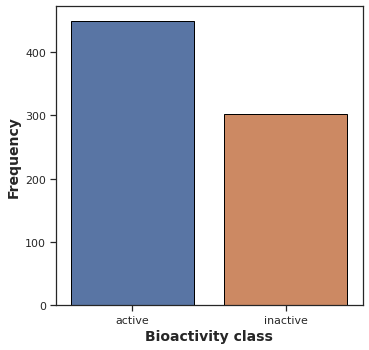

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('hiv_plot_bioactivity_class.pdf')

**SCATTER PLOT OF MW V/S LogP**

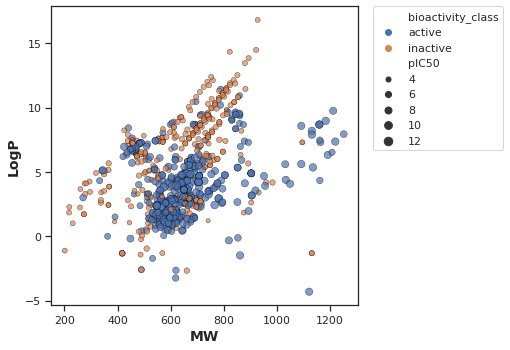

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('hiv_plot_MW_vs_LogP.pdf')

**BOX PLOTS**

**pIC50 VALUE**

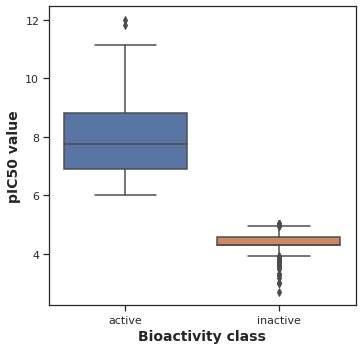

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('hiv_plot_ic50.pdf')

**STATISTICAL ANALYSIS | MANN-WHITNEY U TEST**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.891822e-120,0.05,Different distribution (reject H0)


**MW**

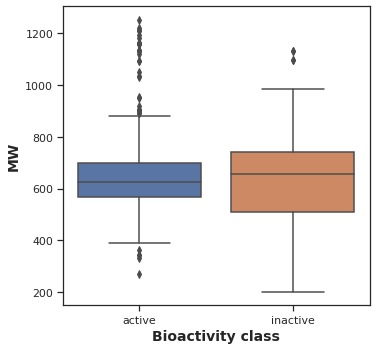

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('hiv_plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,67515.0,0.440859,0.05,Same distribution (fail to reject H0)


**LogP**

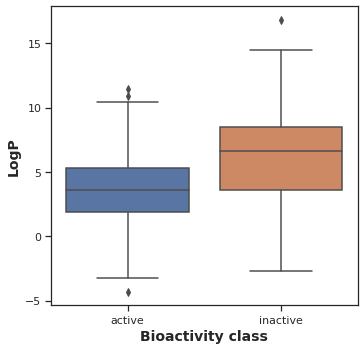

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('hiv_plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,38381.5,2.133638e-24,0.05,Different distribution (reject H0)


**NUMBER OF H DONORS**

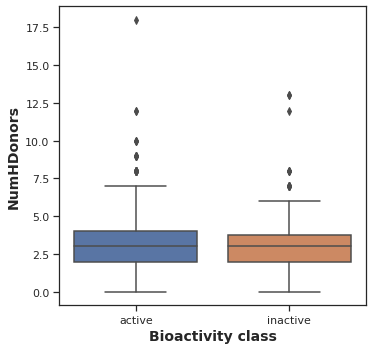

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('hiv_plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,52110.5,1.186706e-08,0.05,Different distribution (reject H0)


NUMBER OF H ACCEPTORS

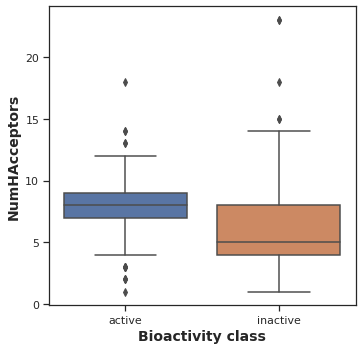

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('hiv_plot_NumHAcceptors.pdf')


In [ ]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,36438.5,8.283926e-28,0.05,Different distribution (reject H0)


**ZIP FILE**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf


Scanning files 
	zip warning: name not matched: drive
  adding: hiv_plot_LogP.pdf (deflated 39%)
  adding: hiv_plot_MW.pdf (deflated 39%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: hiv_bioactivity.csv (deflated 92%)
  adding: hiv_plot_MW_vs_LogP.pdf (deflated 5%)
  adding: hiv_plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: hiv_plot_NumHDonors.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: hiv_plot_NumHAcceptors.pdf (deflated 39%)
  adding: hiv_bioactivity_preprocessed_data.csv (deflated 89%)
  adding: hiv_plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)




---



**DOWNLOAD PaDEL DESCRIPTOR**

In [5]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-09-02 11:04:47--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-09-02 11:04:48--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2021-09-02 11:04:49 (169 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-09-02 11:04:49--  https://gi

In [6]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

**LOAD BIOACTIVITY DATA**

In [7]:
import pandas as pd

In [8]:
df4 = pd.read_csv('hiv_bioactivity_data.csv')


In [49]:
df4

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1627209,O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1...,active,636.814,4.00190,4.0,5.0,7.675718
1,CHEMBL1627287,N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccc...,active,623.775,3.80477,5.0,6.0,6.812761
2,CHEMBL1627235,N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2cc...,active,623.775,3.80477,5.0,6.0,7.428291
3,CHEMBL1627210,N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2c...,active,651.829,4.29997,5.0,6.0,8.602060
4,CHEMBL396814,O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C...,inactive,636.814,4.00190,4.0,5.0,5.000000
...,...,...,...,...,...,...,...,...
747,CHEMBL4525849,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,8.397940
748,CHEMBL4542773,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,775.948,4.10970,5.0,11.0,8.397940
749,CHEMBL4573907,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,8.397940
750,CHEMBL4574382,COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@H](CN(...,active,852.046,5.33250,5.0,11.0,8.397940


In [50]:
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [51]:
! cat molecule.smi | head -5


O=C(N[C@@H]1c2ccccc2C[C@@H]1O)[C@@H](Cc1ccccc1)C[S+]([O-])C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O	CHEMBL1627209
N=[S+]([O-])([C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O)[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O	CHEMBL1627287
N=[S+]([O-])([C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O)[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O	CHEMBL1627235
N=[S+]([O-])(C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O)C[C@H](Cc1ccccc1)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O	CHEMBL1627210
O=C(N[C@H]1c2ccccc2C[C@H]1O)[C@@H](Cc1ccccc1)C[S+]([O-])C[C@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O	CHEMBL396814


In [2]:
! cat molecule.smi | wc -l


752


**CALCULATING FINGERPRINT DESCRIPTORS**

In [9]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [10]:
! bash padel.sh


Processing CHEMBL1627209 in molecule.smi (1/752). 
Processing CHEMBL1627287 in molecule.smi (2/752). 
Processing CHEMBL1627235 in molecule.smi (3/752). Average speed: 6.59 s/mol.
Processing CHEMBL1627210 in molecule.smi (4/752). Average speed: 3.65 s/mol.
Processing CHEMBL396814 in molecule.smi (5/752). Average speed: 4.64 s/mol.
Processing CHEMBL396813 in molecule.smi (6/752). Average speed: 2.34 s/mol.
Processing CHEMBL115 in molecule.smi (7/752). Average speed: 2.27 s/mol.
Processing CHEMBL397402 in molecule.smi (8/752). Average speed: 1.95 s/mol.
Processing CHEMBL247614 in molecule.smi (9/752). Average speed: 1.83 s/mol.
Processing CHEMBL247432 in molecule.smi (10/752). Average speed: 1.63 s/mol.
Processing CHEMBL397403 in molecule.smi (12/752). Average speed: 1.43 s/mol.
Processing CHEMBL298393 in molecule.smi (11/752). Average speed: 1.58 s/mol.
Processing CHEMBL247616 in molecule.smi (13/752). Average speed: 1.42 s/mol.
Processing CHEMBL395207 in molecule.smi (14/752). Average s

In [11]:
ls -l

total 26732
-rw-r--r-- 1 root root  1348085 Sep  2 11:12 descriptors_output.csv
drwx------ 5 root root     4096 Sep  2 11:01 drive/
-rw-r--r-- 1 root root   138656 Sep  2 11:03 hiv_bioactivity_data.csv
drwxr-xr-x 3 root root     4096 Sep  2 11:04 __MACOSX/
-rw-r--r-- 1 root root    87638 Sep  2 11:03 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor/
-rw-r--r-- 1 root root      231 Sep  2 11:04 padel.sh
-rw-r--r-- 1 root root 25768637 Sep  2 11:04 padel.zip
drwxr-xr-x 1 root root     4096 Aug 31 13:18 sample_data/


**MATRIX X -> DESCRIPTORS_OUTPUT**

In [12]:
df4_X = pd.read_csv('descriptors_output.csv')


In [13]:
df4_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1627287,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1627209,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1627235,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1627210,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL396814,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,CHEMBL4525849,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
748,CHEMBL4542773,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
749,CHEMBL4573907,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
750,CHEMBL322241,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df4_X = df4_X.drop(columns=['Name'])
df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
748,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
749,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
750,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**MATRIX Y -> pIC50 VALUES**

In [15]:
df4_Y = df4['pIC50']
df4_Y

0      7.675718
1      6.812761
2      7.428291
3      8.602060
4      5.000000
         ...   
747    8.397940
748    8.397940
749    8.397940
750    8.397940
751    8.200659
Name: pIC50, Length: 752, dtype: float64

**COMBINE MATRICES X AND Y**

In [16]:
dataset4 = pd.concat([df4_X,df4_Y], axis=1)
dataset4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.675718
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.812761
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.428291
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8.602060
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
748,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
749,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
750,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940


In [17]:
dataset4.to_csv('protease_hiv_bioactivity_data_2class_pIC50_pubchem_fp.csv', index=False)





---



**IMPORT LIBRARIES**

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

**LOAD DATASET**

In [19]:
df = pd.read_csv('protease_hiv_bioactivity_data_2class_pIC50_pubchem_fp.csv')


**INPUT FEATURES**

In [20]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
748,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
749,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
750,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**OUTPUT FEATURES**

In [21]:
Y = df.pIC50
Y

0      7.675718
1      6.812761
2      7.428291
3      8.602060
4      5.000000
         ...   
747    8.397940
748    8.397940
749    8.397940
750    8.397940
751    8.200659
Name: pIC50, Length: 752, dtype: float64

**DATA DIMENSIONS**

In [22]:
X.shape


(752, 881)

In [23]:
Y.shape


(752,)

**REMOVING LOW VARIANCE FEATURES**

In [24]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [25]:
X.shape


(752, 148)

**DATA SPLIT (80/20)**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [27]:
X_train.shape, Y_train.shape


((601, 148), (601,))

In [28]:
X_test.shape, Y_test.shape


((151, 148), (151,))

**BUILD REGRESSION MODEL USING RANDOOM FOREST**

In [33]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5615991471233981

In [34]:
Y_pred = model.predict(X_test)

**SCATTER PLOT OF PREDICTED V/S EXPERIMENTAL pIC50 VALUES**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

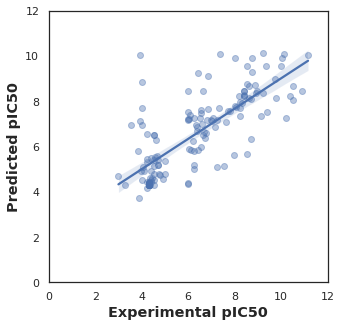

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show



---



**INSTALLING LAZYPREDICT**

In [1]:
! pip install lazypredict


     |████████████████████████████████| 302 kB 29.2 MB/s 
     |████████████████████████████████| 1.2 MB 10.6 MB/s 
     |████████████████████████████████| 72 kB 795 kB/s 
     |████████████████████████████████| 25.9 MB 939 bytes/s 
     |████████████████████████████████| 10.1 MB 34.7 MB/s 
     |████████████████████████████████| 127.6 MB 7.6 kB/s 
     |████████████████████████████████| 14.5 MB 7.8 kB/s 
     |████████████████████████████████| 6.8 MB 40.6 MB/s 
     |████████████████████████████████| 248 kB 59.5 MB/s 
     |████████████████████████████████| 269 kB 57.6 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=c64735386aaa1e619642b66dd0f5985b39bb933ff57e373baf8b95419f2ca379
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successful

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


**LOAD BIOACTIVITY DATA**

In [2]:
df = pd.read_csv('protease_hiv_bioactivity_data_2class_pIC50_pubchem_fp.csv')


In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [4]:
X.shape


(752, 881)

**REMOVING LOW VARIANCE FEATURES**

In [5]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(752, 148)

**DATA SPLIT**

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**COMPARE ML ALGORITHMS**

In [7]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 183692.15it/s]


In [8]:
predictions_train


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.89,0.92,0.60,0.82
DecisionTreeRegressor,0.89,0.92,0.60,0.04
ExtraTreeRegressor,0.89,0.92,0.60,0.06
GaussianProcessRegressor,0.89,0.92,0.60,0.17
XGBRegressor,0.89,0.92,0.60,0.52
RandomForestRegressor,0.84,0.88,0.70,0.81
BaggingRegressor,0.83,0.88,0.72,0.11
LGBMRegressor,0.81,0.85,0.78,0.13
HistGradientBoostingRegressor,0.81,0.85,0.78,1.53


In [14]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


**DATA VISUALIZATION OF MODEL PERFORMANCE**

[(0.0, 1.0)]

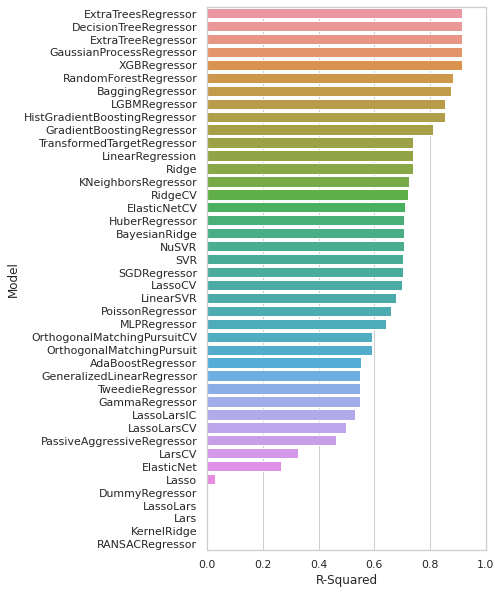

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

**BAR PLOT OF RMSE VALUES**

[(0.0, 10.0)]

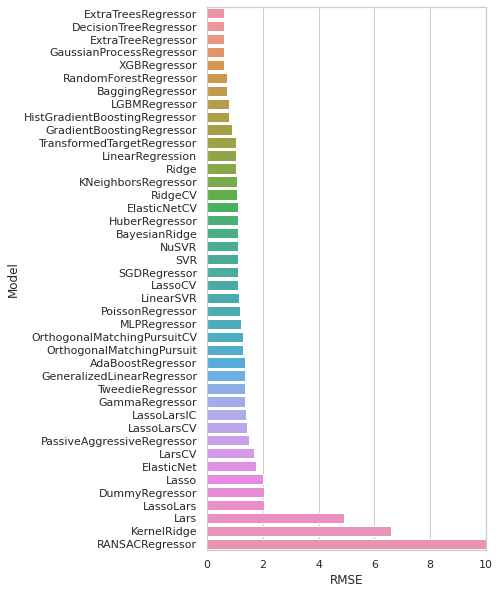

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

**BAR PLOT OF CALCULATION TIME**

[(0.0, 10.0)]

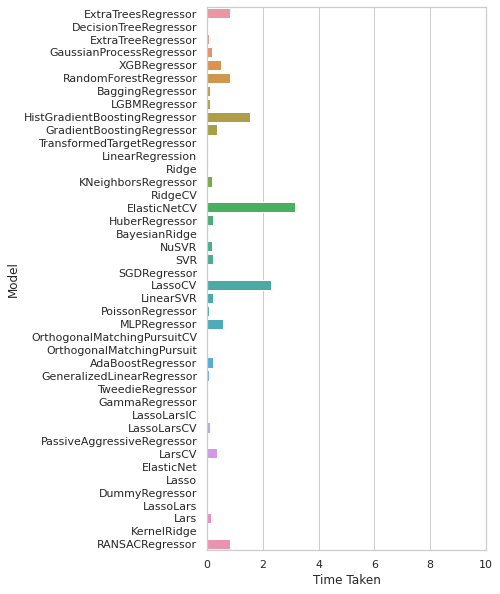

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

**LOAD DATA**



---



In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv('protease_hiv_bioactivity_data_2class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.675718
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.812761
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.428291
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8.602060
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
748,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
749,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
750,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
748,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
749,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
750,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      7.675718
1      6.812761
2      7.428291
3      8.602060
4      5.000000
         ...   
747    8.397940
748    8.397940
749    8.397940
750    8.397940
751    8.200659
Name: pIC50, Length: 752, dtype: float64

**REMOVE LOW VARIANCE FEATURES**

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP21,PubchemFP33,PubchemFP34,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP192,PubchemFP193,PubchemFP199,PubchemFP200,PubchemFP206,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP261,PubchemFP285,PubchemFP293,PubchemFP299,PubchemFP305,PubchemFP308,PubchemFP334,PubchemFP335,PubchemFP338,PubchemFP339,PubchemFP340,PubchemFP341,PubchemFP345,...,PubchemFP657,PubchemFP658,PubchemFP659,PubchemFP662,PubchemFP663,PubchemFP664,PubchemFP665,PubchemFP666,PubchemFP668,PubchemFP671,PubchemFP672,PubchemFP677,PubchemFP681,PubchemFP682,PubchemFP683,PubchemFP684,PubchemFP685,PubchemFP690,PubchemFP691,PubchemFP692,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP700,PubchemFP702,PubchemFP704,PubchemFP711,PubchemFP712,PubchemFP720,PubchemFP725,PubchemFP755,PubchemFP776,PubchemFP777,PubchemFP783,PubchemFP788,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP860
0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
3,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
4,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,1,1,...,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
748,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,1,1,...,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
749,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,1,1,...,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
750,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,...,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

**RANDOM FOREST REGRESSION MODEL**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8909766085795272

**MODEL PREDICTION**

In [9]:
Y_pred = model.predict(X)
Y_pred

array([ 7.64674753,  6.7148092 ,  7.64674753,  8.35185816,  6.7148092 ,
        6.7148092 ,  8.43274309,  7.47023972,  8.37993171,  7.42043652,
        9.53146267,  9.23123566,  9.50395314,  9.42140612,  9.67009386,
        9.57276903,  8.53018157,  7.95242591,  8.90923671,  8.7104222 ,
        5.93188558,  8.05357165,  7.14851507,  7.02213249,  7.02213249,
        7.08261113,  7.05982542,  7.05982542,  7.66031075,  5.86200726,
        7.50374148,  7.36959096,  4.32232049,  4.98737592,  4.98737592,
        6.54359503,  6.54359503,  7.82656236,  6.42405279,  8.41989821,
        9.96539143, 10.00920644,  9.96539143, 10.00920644,  9.63212232,
        9.63212232,  9.80731266,  9.52994067,  9.38345487,  8.52991335,
        8.07802904,  4.05764846,  4.05764846,  4.46527373,  4.46527373,
        4.24380549,  4.24380549,  4.86362372,  4.93630992,  4.9680986 ,
        4.67100722,  4.67100722,  3.84566908,  3.84566908,  6.04979224,
        8.29545049,  7.00295911,  9.73116596,  9.05820689,  6.80

**MODEL PERFORMANCE**

In [10]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.46
Coefficient of determination (R^2): 0.89


**DATA VISUALIZATION- EXPERIMENTAL V/S PREDICTED pIC50**

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

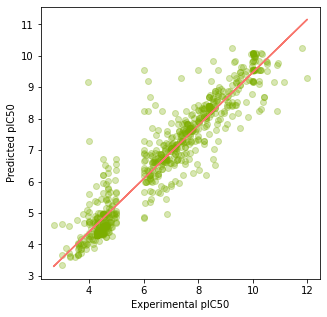

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [13]:
import pickle

In [15]:
pickle.dump(model, open('protease_hiv_model.pkl', 'wb'))